In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2023-04-25 08:53:39.428714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 08:53:39.561473: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 08:53:39.562287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 08:53:40.414367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df = df[pd.Series(map(lambda x:"2012" in x,df["date_time"]))]

In [3]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
2554,NaN,265.69,0.0,0.0,75,Clouds,broken clouds,2012-12-31 19:00:00,3294
2555,NaN,266.18,0.0,0.0,40,Clouds,scattered clouds,2012-12-31 20:00:00,2888
2556,NaN,265.20,0.0,0.0,40,Clouds,scattered clouds,2012-12-31 21:00:00,2588
2557,NaN,264.58,0.0,0.0,40,Mist,mist,2012-12-31 22:00:00,2293


In [4]:
scaler = MinMaxScaler()
df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']] = scaler.fit_transform(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']])

In [5]:
lags = range(1, 25)
for lag in lags:
    df[f't-{lag}'] = df['traffic_volume'].shift(lag)


In [6]:
df.drop("holiday",axis=1,inplace=True)
df.drop("weather_main",axis=1,inplace = True)
df.drop("weather_description",axis=1,inplace= True)

In [7]:
df = df.dropna()

In [8]:
train_data, test_data = df.iloc[:-1000], df.iloc[-1000:]


In [9]:
# select features and target variable
X_train =train_data.drop(['date_time', 'traffic_volume'], axis=1).values
y_train =train_data['traffic_volume'].values
X_test = test_data.drop(['date_time', 'traffic_volume'], axis=1).values
y_test = test_data['traffic_volume'].values

In [10]:
X_train.shape

(1535, 28)

In [11]:
# reshape the input data to a 3D array for LSTM network
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [12]:
X_train.shape

(1535, 1, 28)

In [13]:
# Create and compile LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())


2023-04-25 08:53:42.281391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 08:53:42.283028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 08:53:42.284155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [14]:
# Convert input data to TensorFlow tensor objects
X_train_tf = tf.convert_to_tensor(X_train)
y_train_tf = tf.convert_to_tensor(y_train)


In [15]:
# Fit the LSTM model
history = model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=72, validation_split=0.1, verbose=1, shuffle=False)


Epoch 1/50


2023-04-25 08:53:42.638927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 08:53:42.640125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 08:53:42.641059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 2s 29ms/step - loss: 0.1645 - val_loss: 0.0642
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0701 - val_loss: 0.0469
Epoch 3/50
 1/20 [>.............................] - ETA: 0s - loss: 0.0514

2023-04-25 08:53:44.248760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 08:53:44.249908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 08:53:44.250831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 0s 4ms/step - loss: 0.0489 - val_loss: 0.0352
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0290
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.0261
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.0241
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0221
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.0202
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.0185
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.0171
Epoch 11/50
20/20 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.0158
Epoch 12/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0148
Epoch 13/50
20/20 [=========

In [16]:
# Evaluate the model on test data
X_test_tf = tf.convert_to_tensor(X_test)
y_test_tf = tf.convert_to_tensor(y_test)

test_loss = model.evaluate(X_test_tf, y_test_tf)

print('Test Loss:', test_loss)

32/32 [==============================] - 0s 895us/step - loss: 0.0057
Test Loss: 0.00569069804623723


In [17]:
y_pred = model.predict(X_test_tf)
#y_pred_denormalized = scaler.inverse_transform(y_pred)


32/32 [==============================] - 0s 1ms/step


2023-04-25 08:53:48.163578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 08:53:48.164674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 08:53:48.165513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normed traffic volume')

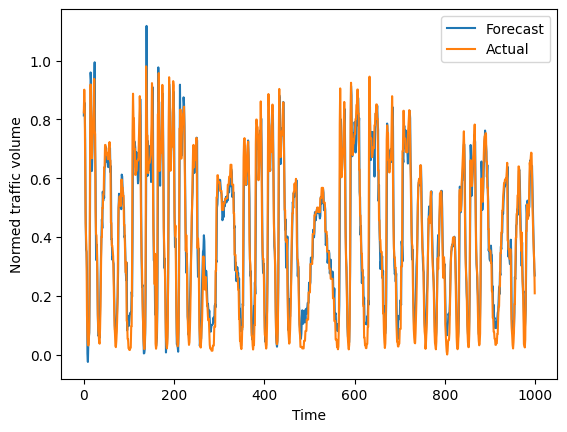

In [21]:
plt.plot(y_pred,label="Forecast")
plt.plot(y_test,label = "Actual")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normed traffic volume")